# 4.0 KNN Experiment

In [74]:
import pandas as pd
data = pd.read_csv("dataset/pose_data_augmented_res.csv")
data2 = data.drop(columns=['image_filename','pose_name','label_encoded','theta'])

raw_features = data.iloc[:,5:103]
add_features = data.iloc[:,113:]
all_features = data.iloc[:,5:] 

data2

label  landmark_00_x  landmark_00_y  landmark_00_z  \
0      advanced-figurehead       0.545408       0.740922      -0.407526   
1      advanced-figurehead       0.607888       0.740922      -0.306625   
2      advanced-figurehead       0.651898       0.740922      -0.196408   
3      advanced-figurehead       0.676100       0.740922      -0.080224   
4      advanced-figurehead       0.679759       0.740922       0.038399   
...                    ...            ...            ...            ...   
19579       yogini-twisted       0.221597       0.731075      -0.655868   
19580       yogini-twisted       0.332121       0.731075      -0.607424   
19581       yogini-twisted       0.432553       0.731075      -0.540524   
19582       yogini-twisted       0.519843       0.731075      -0.457200   
19583       yogini-twisted       0.591337       0.731075      -0.359984   

       landmark_01_x  landmark_01_y  landmark_01_z  landmark_02_x  \
0           0.529543       0.728610      -0.377108       0.529986   
1           0.586982       0.728610      -0.279425       0.587520   
2           0.626586       0.728610      -0.173252       0.627202   
3           0.647152       0.728610      -0.061814       0.647827   
4           0.648054       0.728610       0.051502       0.648768   
...              ...            ...            ...            ...   
19579       0.241815       0.751349      -0.633527       0.239539   
19580       0.348152       0.751349      -0.581912       0.345533   
19581       0.443911       0.751349      -0.512615       0.441028   
19582       0.526182       0.751349      -0.427743       0.523123   
19583       0.592465       0.751349      -0.329874       0.589323   

       landmark_02_y  landmark_02_z  ...  d_elbows  d_knees  d_ankles  \
0           0.724919      -0.377690  ...    0.0334   0.0267    0.0124   
1           0.724919      -0.279921  ...    0.1425   0.1129    0.1207   
2           0.724919      -0.173647  ...    0.2668   0.2357    0.2498   
3           0.724919      -0.062097  ...    0.3841   0.3521    0.3714   
4           0.724919       0.051341  ...    0.4901   0.4580    0.4817   
...              ...            ...  ...       ...      ...       ...   
19579       0.752497      -0.631352  ...    0.5911   0.5505    0.6199   
19580       0.752497      -0.580165  ...    0.5291   0.5494    0.6267   
19581       0.752497      -0.511350  ...    0.4541   0.5319    0.6252   
19582       0.752497      -0.426997  ...    0.3702   0.4986    0.6154   
19583       0.752497      -0.329671  ...    0.2845   0.4507    0.5982   

       a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
0                     10.7029               -122.8088              0.6969   
1                   -137.2727                 33.0201            -25.9627   
2                   -134.0704                 41.4422            -51.8355   
3                   -126.3352                 50.6887            -74.8649   
4                   -114.6003                 63.1216            -92.7334   
...                       ...                     ...                 ...   
19579                121.7164                -47.0931            154.3500   
19580                140.0934                -26.8885            154.1885   
19581                147.7341                -16.1314            153.2878   
19582                149.7391                 -8.2069            151.5254   
19583                145.5600                  1.8422            148.6396   

       a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
0                     291.3413             98.4931                 276.8157   
1                     294.2652             94.5808                 268.7887   
2                     295.3539             88.8913                 254.5938   
3                     294.9057             81.4701                 231.1617   
4                     293.0172             72.4473                 200.5086   
...            

## 4.1 Cross Validation for Optimal K

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

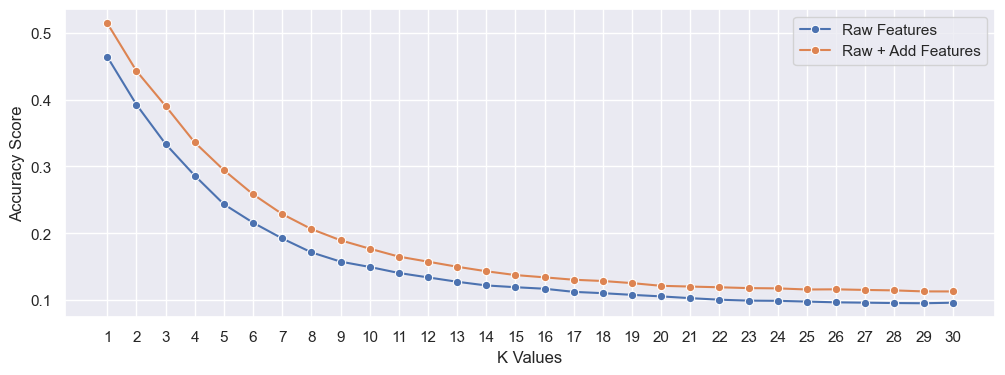

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(raw_features)
X2 = scaler.fit_transform(all_features)
y = labels
k_values = [i for i in range(1, 31)]

scores_v1 = []
scores_v2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score_v1 = cross_val_score(knn, X1, y, cv=5)
    score_v2 = cross_val_score(knn, X2, y, cv=5)
    scores_v1.append(np.mean(score_v1))
    scores_v2.append(np.mean(score_v2))
    
sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_v1, marker = 'o', label='Raw Features')
sns.lineplot(x = k_values, y = scores_v2, marker = 'o', label='Raw + Add Features')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.xticks(ticks=k_values)
plt.show()

## 3.2 PCA vs. LDA

In [75]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import pandas as pd

X1 = scaler.fit_transform(raw_features)
X2 = scaler.fit_transform(all_features)
y = labels
class_names = data['label'].values

data['image_filename'] = 'dataset/' + data['image_filename'].astype(str)
image_files = data['image_filename'].values

### PCA Pipeline

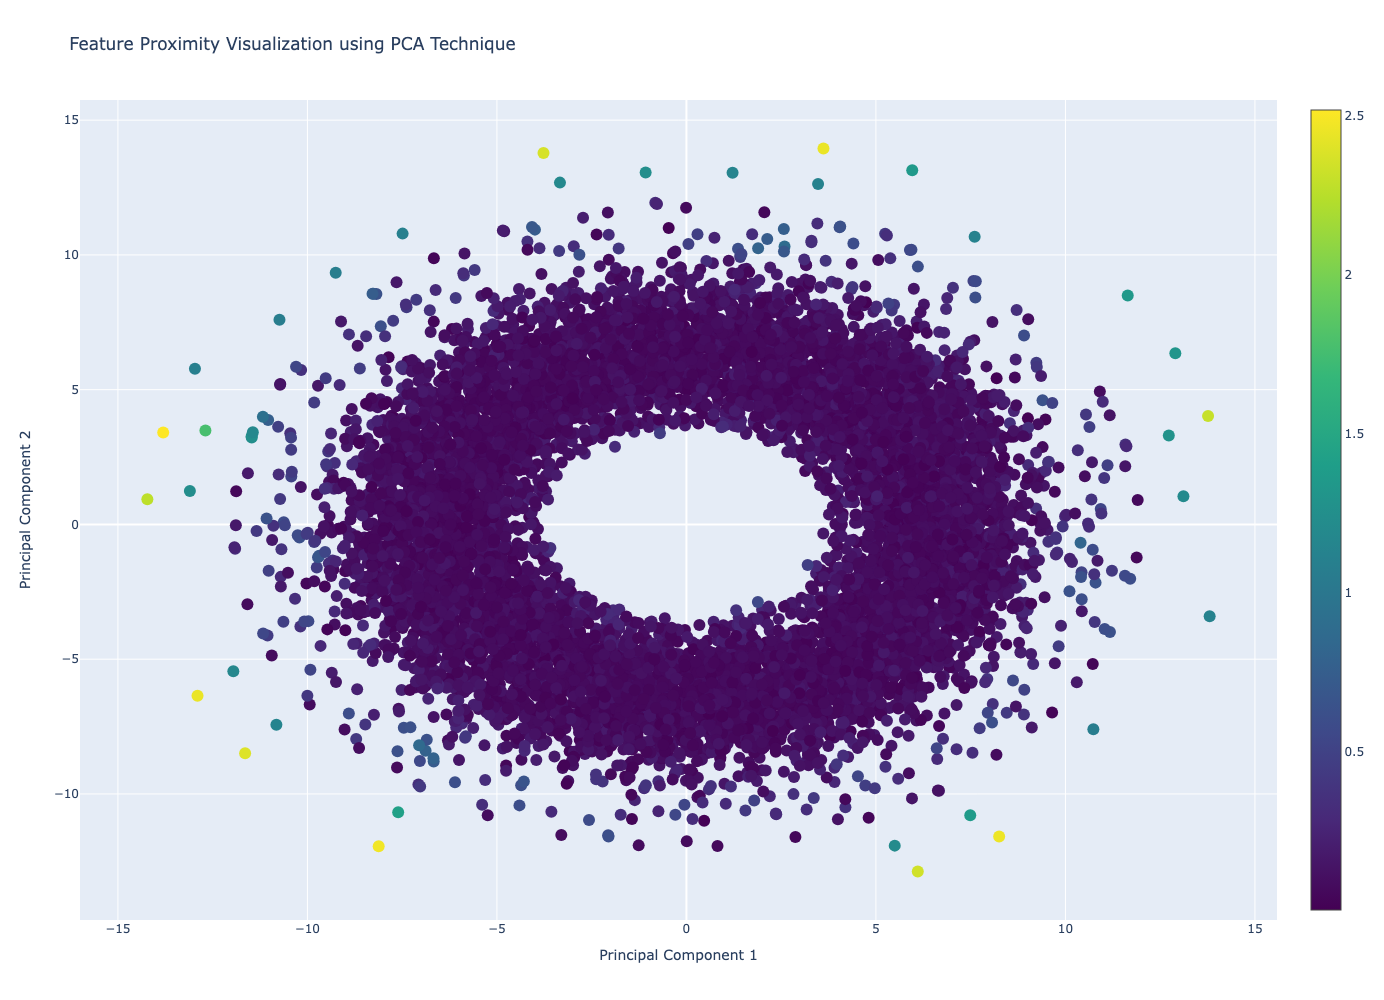

In [61]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X1)

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X_reduced, y, image_filenames, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

distances, indices = knn.kneighbors(X_test)

fig = go.Figure(data=[
    go.Scatter(
        x=X_test[:, 0], y=X_test[:, 1],
        mode='markers',
        marker=dict(
            size=12,
            color=distances.mean(axis=1), 
            colorscale='Viridis', 
            showscale=True
        ),
        text=class_names, 
        hoverinfo='text'
    )
])



fig.update_layout(
    title="Feature Proximity Visualization using PCA Technique",
    width=1000,
    height=1000,
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    legend_title="Legend"
)

fig.show()

### LDA Pipeline

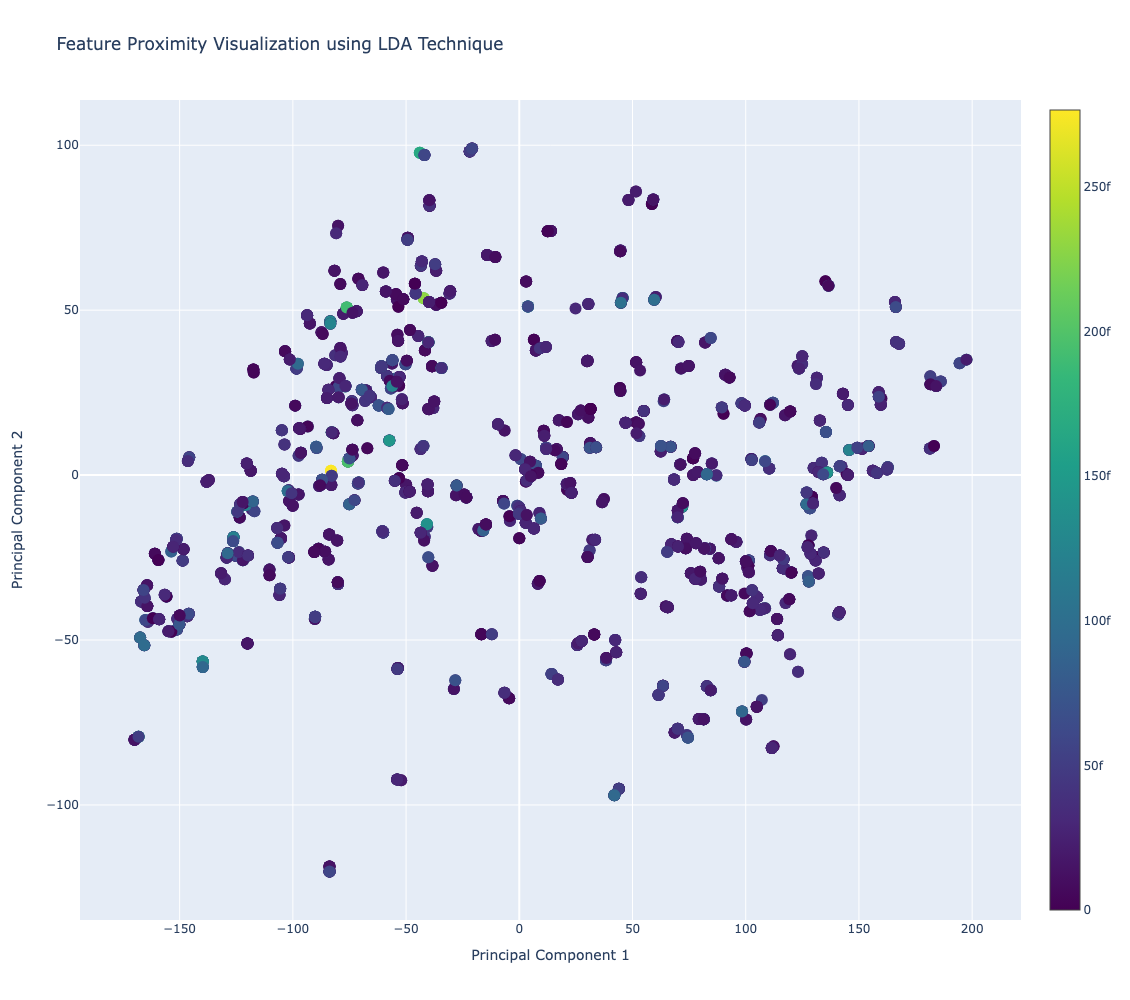

In [95]:
X_reduced = lda.fit_transform(X1, y) 
lda = LinearDiscriminantAnalysis(n_components=2)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.14, random_state=1)


knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='kd_tree', leaf_size=100)
knn.fit(X_train, y_train)

distances, indices = knn.kneighbors(X_test)

fig = go.Figure(data=[
    go.Scatter(
        x=X_test[:, 0], y=X_test[:, 1],
        mode='markers',
        marker=dict(
            size=12,
            color=distances.mean(axis=1),
            colorscale='Viridis', 
            showscale=True
        ),
        text=class_names, 
        
    )
])



fig.update_layout(
    title="Feature Proximity Visualization using LDA Technique",
    width=1000,
    height=1000,
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    legend_title="Legend"
)

fig.show()

### **Results**

PCA is identifying the main axis of variation without considering how classes are separated, hence the donut shape doesn't reflect class separation. LDA, on the other hand, shows how classes are separated from each other, which is more beneficial for the pole stunt classifcation.